In [1]:
! pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import math
import copy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as tranforms
import torch.optim as optim

from PIL import Image

import glob 
import matplotlib.image as mpimg

In [4]:
df = pd.read_csv('/content/drive/MyDrive/artists.csv')

In [5]:
df.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [6]:
df.set_index('id', inplace=True)

In [7]:
df.head()

,name,years,genre,nationality,bio,wikipedia,paintings
id,,,,,,,
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [8]:
model= models.vgg19(pretrained = True).features

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [9]:
print(model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [10]:
for param in model.parameters():
  param.requires_grad_(False)


dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(dev)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [11]:
from torchvision.ops.poolers import torchvision
def load_img(path, max_size = 400, shape = None):
  image = Image.open(path).convert('RGB')

  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)


  if shape is not None:
    size = shape


  in_trans = tranforms.Compose([tranforms.Resize(size),
                                 tranforms.ToTensor(),
                                 tranforms.Normalize((0.485, 0.456, 0.406),
                                                      (0.229, 0.224, 0.225))])
  image = in_trans(image)[:3,:,:].unsqueeze(0)

  return image

In [12]:
from PIL import Image
import glob 
image_lst = []
for filename in glob.glob('/content/drive/MyDrive/Dataset/*.jpg'):
  im = Image.open(filename)
  image_lst.append(im)

In [27]:
data = load_img('/content/drive/MyDrive/Dataset/Albrecht_Dürer_102.jpg').to(dev)
style_data = load_img('/content/drive/MyDrive/Dataset/Amedeo_Modigliani_109.jpg').to(dev)


In [28]:
def convert(tensor):
  image = tensor.to("cpu").clone().detach()
  image = image.numpy().squeeze()
  image = image.transpose(1,2,0)
  image = image * np.array((0.229, 0.224, 0.225)) + np.array((0.485, 0.456, 0.406))
  image = image.clip(0, 1)

  return image

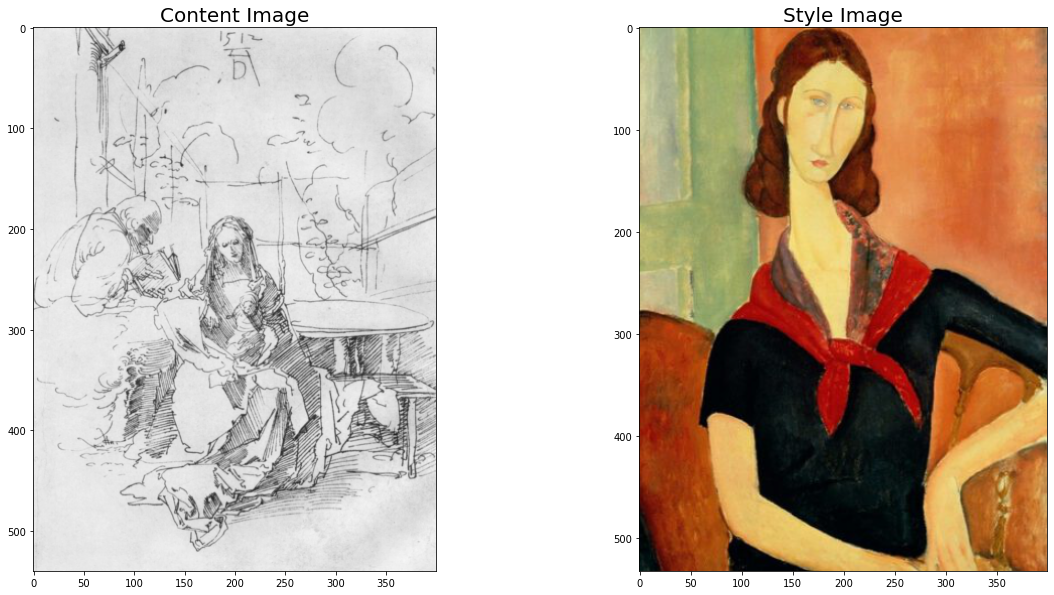

In [29]:
fig ,( ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

ax1.imshow(convert(data))
ax1.set_title("Content Image",fontsize = 20)
ax2.imshow(convert(style_data))
ax2.set_title("Style Image", fontsize = 20)
plt.show()

## Model

In [30]:
def features(image, model, layers= None):
  if layers is None:
    layers = {'0': 'conv1_1',
                  '5': 'conv2_1', 
                  '10': 'conv3_1', 
                  '19': 'conv4_1',
                  '21': 'conv4_2', 
                  '28': 'conv5_1'}
    features = {}
    x= image
    for name, layer in model._modules.items():
      x = layer(x)
      if name in layers:
        features[layers[name]] = x
    
    return features


In [31]:
# gram matrix
def gram_matrix(tensor):
  _, d, h, w = tensor.size()

  tensor = tensor.view(d, h*w)
  gram = torch.mm(tensor, tensor.t())
  return gram

In [32]:
cont_features = features(data, model)
style_feat = features(style_data, model)

style_grams = {layer: gram_matrix(style_feat[layer])for layer in style_feat}
target = data.clone().requires_grad_(True).to(dev)

Total Loss:  91320958976.0


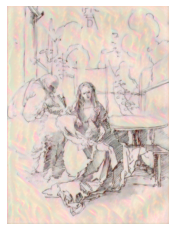

<Figure size 504x504 with 0 Axes>

Total Loss:  63734923264.0


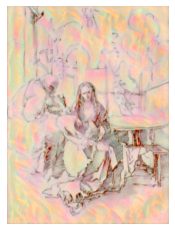

<Figure size 504x504 with 0 Axes>

Total Loss:  39968530432.0


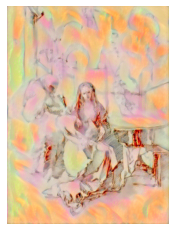

<Figure size 504x504 with 0 Axes>

Total Loss:  24250875904.0


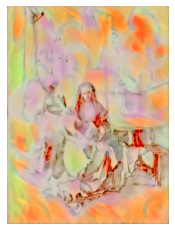

<Figure size 504x504 with 0 Axes>

Total Loss:  14284768256.0


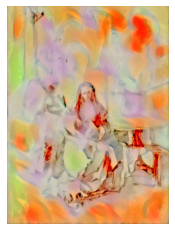

<Figure size 504x504 with 0 Axes>

In [33]:
# Loss and Weights

style_weights = {'conv1_1': 1.,
                 'conv2_1': 0.75,
                 'conv3_1': 0.2,
                 'conv4_1': 0.2,
                 'conv5_1': 0.2}
data_weights= 1
style_weight = 1e9

#Total loss

show_every = 400

optimizer = optim.Adam([target], lr = 0.003)
steps = 2000

for ii in range(1, steps+1):
  target_feat = features(target, model)
  cont_loss = torch.mean((target_feat['conv4_2'] - cont_features['conv4_2'])**2)

  style_loss = 0
  for layer in style_weights:
    target_feats = target_feat[layer]
    target_gram = gram_matrix(target_feats)
    _, d, h, w = target_feats.shape

    style_gram = style_grams[layer]
    layer_style_loss = style_weights[layer]* torch.mean((target_gram - style_gram)**2)
    style_loss += layer_style_loss / (d * h * w)
  
  total_loss = data_weights * cont_loss + style_weight * style_loss

  optimizer.zero_grad()
  total_loss.backward()
  optimizer.step()

  if ii % show_every == 0:
    print('Total Loss: ', total_loss.item())
    plt.imshow(convert(target))
    plt.axis('off')
    plt.grid(False)
    plt.figure(figsize = (7, 7))
    plt.show()

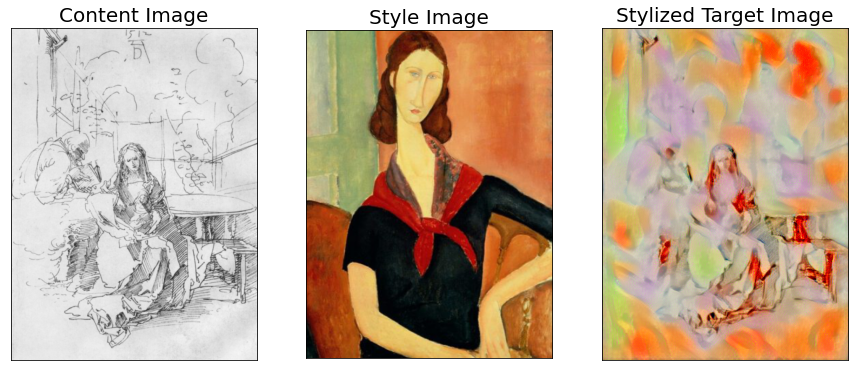

In [34]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 15))
ax1.imshow(convert(data))
ax1.set_title("Content Image", fontsize = 20)
ax2.imshow(convert(style_data))
ax2.set_title("Style Image", fontsize = 20)
ax3.imshow(convert(target))
ax3.set_title("Stylized Target Image", fontsize = 20)
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)

ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])

plt.show()


